# Working with complicated dataset

Your name: Munkh-Erdene Khuderbaatar

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [70]:
import pandas as pd

# set the labels
labels = ["query acc.ver", "subject acc.ver", "% identity", "alignment length", "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end", "evalue", "bit score", "% positives", "bonds", "publications", "Empty"]

# read in the messy data in a clean way
blast_df = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv", skiprows=7, names=labels, na_values=['-'], thousands=",")

In [71]:
# drop the first column (they are all the same)
blast_df_clean = blast_df.drop("query acc.ver", axis = 1)

In [72]:
# drop the last column (empty)
blast_df_clean = blast_df_clean.drop("Empty", axis = 1)

In [73]:
# set the index to subject acc.ver
blast_df_clean = blast_df_clean.set_index("subject acc.ver")

In [74]:
blast_df_clean.head(5)

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0


### Question 2
What is the average number of publications?

In [82]:
blast_df_clean["publications"].mean(skipna=True)

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [87]:
blast_df_clean[blast_df_clean["bonds"] >= 15_000].index

Index(['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1',
       '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1',
       'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1',
       'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1',
       'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1',
       'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1',
       'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1',
       'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1',
       'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1'],
      dtype='object', name='subject acc.ver')

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

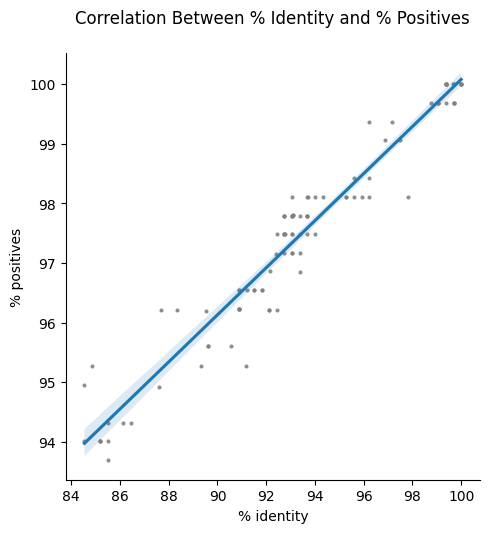

In [107]:
# relplot will be suitable for 2 continuous values
sns.lmplot(
    data = blast_df_clean,
    x = "% identity",
    y = "% positives",
    scatter_kws = {"s" : 4, "color": "grey"}
)
plt.title("Correlation Between % Identity and % Positives", y=1.05)
plt.show()


### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [98]:
protein_df = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv")

In [101]:
protein_df = protein_df.drop("Unnamed: 0", axis = 1)

In [129]:
merged = blast_df_clean.merge(protein_df, left_on = blast_df_clean.index, right_on = "Protein", how = "left")

In [137]:
merged = merged.set_index("Protein")

In [141]:
merged = merged.rename(columns = {"Source" : "Protein Source"})

In [142]:
merged.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein Source
Protein,,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,RefSeq
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NaN
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,GenPept
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NaN
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NaN
